## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

In [2]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

## Reading and Understanding Data

In [3]:
df = pd.read_excel('product.xlsx')
df.head(10)

,CustomerID,Date,Product Description
0,1808,2015-07-21,tropical fruit
1,2552,2015-01-05,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-02-01,whole milk
5,4941,2015-02-14,rolls/buns
6,4501,2015-05-08,other vegetables
7,3803,2015-12-23,pot plants
8,2762,2015-03-20,whole milk
9,4119,2015-02-12,tropical fruit


In [4]:
total_entries = df.shape
print('Total number of records = ', total_entries[0])

Total number of records =  38765


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           38765 non-null  int64         
 1   Date                 38765 non-null  datetime64[ns]
 2   Product Description  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


##  Preparing dataset

In [6]:
print('Column name\t  Null values')
df.isnull().sum().sort_values(ascending=False)

Column name	  Null values


Product Description    0
Date                   0
CustomerID             0
dtype: int64

In [7]:
# customer transaction history
df['Date'] = pd.to_datetime(df['Date'])
df[df['CustomerID'] == 2300].sort_values(by='Date',ascending=False).style.hide_index()

CustomerID,Date,Product Description
2300,2015-09-19 00:00:00,pip fruit
2300,2015-09-19 00:00:00,other vegetables
2300,2015-09-19 00:00:00,flour
2300,2015-08-05 00:00:00,frankfurter
2300,2015-08-05 00:00:00,long life bakery product
2300,2015-04-28 00:00:00,sausage
2300,2015-04-28 00:00:00,white wine
2300,2015-04-28 00:00:00,hygiene articles
2300,2014-03-16 00:00:00,pork
2300,2014-03-16 00:00:00,fruit/vegetable juice


In [8]:
# items purchased for each transaction
transactions = [t[1]['Product Description'].tolist() for t in list(df.groupby(['CustomerID','Date']))]

print('Total number of transactions = ', len(transactions))
print('\nFirst 10 transactions list:\n')

from itertools import islice
trans_list = transactions
iterator = islice(trans_list, 10)
for i in iterator:
    print(i)

Total number of transactions =  14963

First 10 transactions list:

['whole milk', 'pastry', 'salty snack']
['sausage', 'whole milk', 'semi-finished bread', 'yogurt']
['soda', 'pickled vegetables']
['canned beer', 'misc. beverages']
['sausage', 'hygiene articles']
['sausage', 'whole milk', 'rolls/buns']
['whole milk', 'soda']
['frankfurter', 'soda', 'whipped/sour cream']
['beef', 'white bread']
['frankfurter', 'curd']


In [9]:
# mlxend encoder and convert to dataframe
transaction_encode = TransactionEncoder()
transaction_encode_array = transaction_encode.fit(transactions).transform(transactions)

transactions = pd.DataFrame(transaction_encode_array, columns=transaction_encode.columns_)
transactions.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
print('Total number of transaction records = ', transactions.shape[0])
print('\nTotal number of columns(items) = ', transactions.shape[1])

Total number of transaction records =  14963

Total number of columns(items) =  167


In [11]:
# items purchase count
trans_describe = transactions.describe()
describe = trans_describe.iloc[0]-trans_describe.iloc[3]
value = describe.tolist()
name_list = list(describe.index)

item_count = pd.DataFrame([[value[i],name_list[i]]for i in range(len(value))], columns=['Count','Item'])
item_count = item_count.sort_values(['Count'], ascending=False).head(10) 

print('Top 10 Frequent Basket Items')
item_count.style.hide_index()

Top 10 Frequent Basket Items


Count,Item
2363,whole milk
1827,other vegetables
1646,rolls/buns
1453,soda
1285,yogurt
1041,root vegetables
1014,tropical fruit
908,bottled water
903,sausage
795,citrus fruit


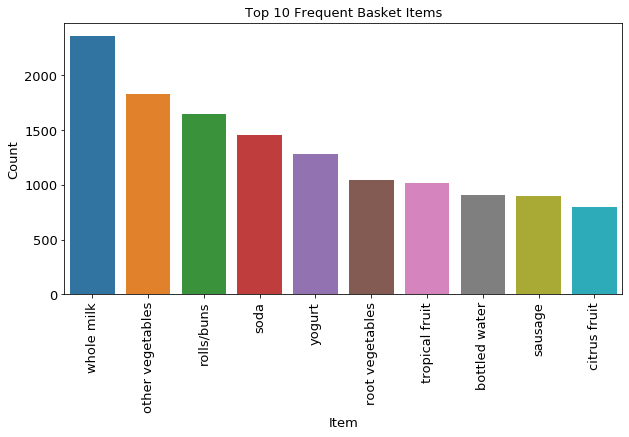

In [12]:
plt.figure(figsize=(10,5))
sns.barplot('Item','Count', data = item_count)
plt.xlabel('Item',fontsize=13)
plt.ylabel('Count',fontsize=13)
plt.title('Top 10 Frequent Basket Items',fontsize=13)
plt.xticks(rotation=90)
plt.tick_params(labelsize=13)

## Apriori algorithm
minimum support = 0.001 and maximum length of itemset = 5

In [13]:
frequent_itemsets_apriori = apriori(transactions, min_support=0.001, use_colnames=True, max_len=5)
frequent_itemsets_apriori['length'] = frequent_itemsets_apriori['itemsets'].apply(lambda x: len(x))
frequent_itemsets_apriori.head(10)

,support,itemsets,length
0,0.004010,(Instant food products),1
1,0.021386,(UHT-milk),1
2,0.001470,(abrasive cleaner),1
3,0.001938,(artif. sweetener),1
4,0.008087,(baking powder),1
5,0.001136,(bathroom cleaner),1
6,0.033950,(beef),1
7,0.021787,(berries),1
8,0.016574,(beverages),1
9,0.045312,(bottled beer),1


In [14]:
frequent_itemsets_apriori.tail(10)

,support,itemsets,length
740,0.011161,"(whole milk, yogurt)",2
741,0.001136,"(rolls/buns, other vegetables, soda)",3
742,0.001203,"(rolls/buns, whole milk, other vegetables)",3
743,0.001136,"(whole milk, soda, other vegetables)",3
744,0.001136,"(whole milk, yogurt, other vegetables)",3
745,0.001136,"(rolls/buns, whole milk, sausage)",3
746,0.001002,"(rolls/buns, whole milk, soda)",3
747,0.001337,"(rolls/buns, whole milk, yogurt)",3
748,0.001069,"(whole milk, sausage, soda)",3
749,0.001470,"(whole milk, sausage, yogurt)",3


In [15]:
rules_apriori = association_rules(frequent_itemsets_apriori, metric="lift", min_threshold=0.001)
rules_apriori.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bottled water),(UHT-milk),0.060683,0.021386,0.001069,0.017621,0.823954,-0.000228,0.996168
1,(UHT-milk),(bottled water),0.021386,0.060683,0.001069,0.050000,0.823954,-0.000228,0.988755
2,(other vegetables),(UHT-milk),0.122101,0.021386,0.002139,0.017515,0.818993,-0.000473,0.996060
3,(UHT-milk),(other vegetables),0.021386,0.122101,0.002139,0.100000,0.818993,-0.000473,0.975443
4,(rolls/buns),(UHT-milk),0.110005,0.021386,0.001804,0.016403,0.767013,-0.000548,0.994934
5,(UHT-milk),(rolls/buns),0.021386,0.110005,0.001804,0.084375,0.767013,-0.000548,0.972009
6,(UHT-milk),(root vegetables),0.021386,0.069572,0.001002,0.046875,0.673766,-0.000485,0.976187
7,(root vegetables),(UHT-milk),0.069572,0.021386,0.001002,0.014409,0.673766,-0.000485,0.992921
8,(UHT-milk),(sausage),0.021386,0.060349,0.001136,0.053125,0.880298,-0.000154,0.992371
9,(sausage),(UHT-milk),0.060349,0.021386,0.001136,0.018826,0.880298,-0.000154,0.997391


In [16]:
rules_apriori.tail(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1228,"(sausage, soda)",(whole milk),0.005948,0.157923,0.001069,0.179775,1.138374,0.000130,1.026642
1229,(whole milk),"(sausage, soda)",0.157923,0.005948,0.001069,0.006771,1.138374,0.000130,1.000829
1230,(sausage),"(whole milk, soda)",0.060349,0.011629,0.001069,0.017719,1.523708,0.000368,1.006200
1231,(soda),"(whole milk, sausage)",0.097106,0.008955,0.001069,0.011012,1.229612,0.000200,1.002079
1232,"(whole milk, sausage)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,0.000701,1.093681
1233,"(whole milk, yogurt)",(sausage),0.011161,0.060349,0.001470,0.131737,2.182917,0.000797,1.082219
1234,"(sausage, yogurt)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,0.000563,1.131541
1235,(whole milk),"(sausage, yogurt)",0.157923,0.005748,0.001470,0.009310,1.619866,0.000563,1.003596
1236,(sausage),"(whole milk, yogurt)",0.060349,0.011161,0.001470,0.024363,2.182917,0.000797,1.013532
1237,(yogurt),"(whole milk, sausage)",0.085879,0.008955,0.001470,0.017121,1.911760,0.000701,1.008307


## FPGrowth algorithm

minimum support = 0.001 and maximum length of itemset = 5

In [17]:
frequent_itemsets_fpgrowth = fpgrowth(transactions, min_support=0.001, use_colnames=True, max_len=5)
frequent_itemsets_fpgrowth['length'] = frequent_itemsets_fpgrowth['itemsets'].apply(lambda x: len(x))
frequent_itemsets_fpgrowth.head(10)

,support,itemsets,length
0,0.157923,(whole milk),1
1,0.051728,(pastry),1
2,0.018780,(salty snack),1
3,0.085879,(yogurt),1
4,0.060349,(sausage),1
5,0.009490,(semi-finished bread),1
6,0.097106,(soda),1
7,0.008955,(pickled vegetables),1
8,0.046916,(canned beer),1
9,0.015772,(misc. beverages),1


In [18]:
frequent_itemsets_fpgrowth.tail(10)

,support,itemsets,length
740,0.001136,"(waffles, yogurt)",2
741,0.001069,"(rolls/buns, cat food)",2
742,0.001002,"(tropical fruit, cat food)",2
743,0.001671,"(whole milk, cat food)",2
744,0.001671,"(whole milk, chewing gum)",2
745,0.001403,"(chewing gum, yogurt)",2
746,0.001069,"(other vegetables, chewing gum)",2
747,0.001002,"(chewing gum, soda)",2
748,0.001069,"(whole milk, pasta)",2
749,0.001002,"(rolls/buns, seasonal products)",2


In [19]:
rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric="lift", min_threshold=0.001)
rules_fpgrowth.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(pastry),(whole milk),0.051728,0.157923,0.006483,0.125323,0.793571,-0.001686,0.962729
1,(whole milk),(pastry),0.157923,0.051728,0.006483,0.041050,0.793571,-0.001686,0.988865
2,(pastry),(root vegetables),0.051728,0.069572,0.002874,0.055556,0.798538,-0.000725,0.985159
3,(root vegetables),(pastry),0.069572,0.051728,0.002874,0.041306,0.798538,-0.000725,0.989130
4,(pastry),(other vegetables),0.051728,0.122101,0.003676,0.071059,0.581972,-0.002640,0.945054
5,(other vegetables),(pastry),0.122101,0.051728,0.003676,0.030104,0.581972,-0.002640,0.977705
6,(pastry),(yogurt),0.051728,0.085879,0.003609,0.069767,0.812397,-0.000833,0.982681
7,(yogurt),(pastry),0.085879,0.051728,0.003609,0.042023,0.812397,-0.000833,0.989870
8,(pastry),(sausage),0.051728,0.060349,0.003208,0.062016,1.027617,0.000086,1.001777
9,(sausage),(pastry),0.060349,0.051728,0.003208,0.053156,1.027617,0.000086,1.001509


In [20]:
rules_fpgrowth.tail(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1228,(chewing gum),(yogurt),0.012030,0.085879,0.001403,0.116667,1.358508,0.000370,1.034855
1229,(yogurt),(chewing gum),0.085879,0.012030,0.001403,0.016342,1.358508,0.000370,1.004384
1230,(other vegetables),(chewing gum),0.122101,0.012030,0.001069,0.008758,0.727994,-0.000400,0.996699
1231,(chewing gum),(other vegetables),0.012030,0.122101,0.001069,0.088889,0.727994,-0.000400,0.963547
1232,(chewing gum),(soda),0.012030,0.097106,0.001002,0.083333,0.858167,-0.000166,0.984975
1233,(soda),(chewing gum),0.097106,0.012030,0.001002,0.010323,0.858167,-0.000166,0.998276
1234,(whole milk),(pasta),0.157923,0.008087,0.001069,0.006771,0.837316,-0.000208,0.998675
1235,(pasta),(whole milk),0.008087,0.157923,0.001069,0.132231,0.837316,-0.000208,0.970394
1236,(rolls/buns),(seasonal products),0.110005,0.007084,0.001002,0.009113,1.286395,0.000223,1.002048
1237,(seasonal products),(rolls/buns),0.007084,0.110005,0.001002,0.141509,1.286395,0.000223,1.036698


## Apriori vs FPGrowth

In [21]:
print('Time taken by apriori algorithm = ')
%timeit -n 100 -r 10 apriori(transactions[:500], min_support=0.1)

Time taken by apriori algorithm = 
2.42 ms ± 181 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


In [22]:
print('Time taken by fpgrowth algorithm = ')
%timeit -n 100 -r 10 fpgrowth(transactions[:500], min_support=0.1)

Time taken by fpgrowth algorithm = 
3.52 ms ± 243 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
